# Summative Assessment - Data Analytics and Visualization

This assessment will cover the following:
- Importing the data and dealing with missing values
- Exploring the data and producing some simple visualizations
- Sampling and comparing samples
- Looking for correlation
- Using regression to predict power consumption

It's split into tasks, each in its own section. Write your code and answers in the spaces provided. Feel free to add cells and import any libraries you'll require.

## The data

The data we'll be using in this assesssment was downloaded from data.world (https://data.world/databeats/household-power-consumption), a subset of a larger dataset available from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption#).

It may look familiar to some of you!

Here's the description of the data from the site:

<b>Data Set Information</b>

This household electricity consumption dataset contains 260,640 measurements gathered between January 2007 and June 2007 (6 months). It is a subset of a larger, original archive that contains 2,075,259 measurements gathered between December 2006 and November 2010 (47 months).

<b>Attribute Information</b>

<b>`date`</b>: Date in format dd/mm/yyyy

<b>`time`</b>: time in format hh:mm:ss

<b>`global_active_power`</b>: household global minute-averaged active power (in kilowatt)

<b>`global_reactive_power`</b>: household global minute-averaged reactive power (in kilowatt)

<b>`voltage`</b>: minute-averaged voltage (in volt)

<b>`global_intensity`</b>: household global minute-averaged current intensity (in ampere)

<b>`sub_metering_1`</b>: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

<b>`sub_metering_2`</b>: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

<b>`sub_metering_3`</b>: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

## Assessment Flow

# `________________________________________________________________`









## Task 1 - Getting the data!

*The* data has not been downloaded for you. Save the file and add the correct file path for your file.

In [1]:
file_path = 'household_power_consumption-household_power_consumption.csv'

It is comma separated, but has a major issue you'll have to deal with before you can begin working with it: missing values are marked with a '?'. You'll need to remove all rows with missing values and make sure the columns are the right type before we move on. This is a classic example of a problem whose solution isn't worth memorizing, so if you're struggling take a look around on stack overflow or elsewhere for others who've solved the same problem!

In [2]:
# Import the libraries you'll be using and load the data into a pandas dataframe here

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from pandas.plotting import scatter_matrix

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv(file_path, sep=',', low_memory=False)

In [5]:
df.describe()

,Sub_metering_3
count,256869.000000
mean,5.831825
std,8.186709
min,0.000000
25%,0.000000
50%,0.000000
75%,17.000000
max,20.000000


In [6]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1/1/07,0:00:00,2.58,0.136,241.97,10.6,0,0,0.0
1,1/1/07,0:01:00,2.552,0.1,241.75,10.4,0,0,0.0
2,1/1/07,0:02:00,2.55,0.1,241.64,10.4,0,0,0.0
3,1/1/07,0:03:00,2.55,0.1,241.71,10.4,0,0,0.0
4,1/1/07,0:04:00,2.554,0.1,241.98,10.4,0,0,0.0


In [7]:
df.isnull().sum()

Date                        0
Time                        0
Global_active_power         0
Global_reactive_power       0
Voltage                     0
Global_intensity            0
Sub_metering_1              0
Sub_metering_2              0
Sub_metering_3           3771
dtype: int64

In [8]:
df = df.loc[df['Global_active_power']!="?"]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256869 entries, 0 to 260639
Data columns (total 9 columns):
Date                     256869 non-null object
Time                     256869 non-null object
Global_active_power      256869 non-null object
Global_reactive_power    256869 non-null object
Voltage                  256869 non-null object
Global_intensity         256869 non-null object
Sub_metering_1           256869 non-null object
Sub_metering_2           256869 non-null object
Sub_metering_3           256869 non-null float64
dtypes: float64(1), object(8)
memory usage: 19.6+ MB


In [10]:
df[df.columns[2:]] = df[df.columns[2:]].astype(float)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256869 entries, 0 to 260639
Data columns (total 9 columns):
Date                     256869 non-null object
Time                     256869 non-null object
Global_active_power      256869 non-null float64
Global_reactive_power    256869 non-null float64
Voltage                  256869 non-null float64
Global_intensity         256869 non-null float64
Sub_metering_1           256869 non-null float64
Sub_metering_2           256869 non-null float64
Sub_metering_3           256869 non-null float64
dtypes: float64(7), object(2)
memory usage: 19.6+ MB


In [12]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True, errors='ignore')

In [13]:
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Datetime                 0
dtype: int64

Now, we can start looking at this data. Assuming you've called your dataframe 'df', run df.head() and df.describe() to see what we're working with. Remember, at this stage you shouldn't have missing data.

In [14]:
# Look at the data you've loaded
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,1/1/07,0:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0,2007-01-01 00:00:00
1,1/1/07,0:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0,2007-01-01 00:01:00
2,1/1/07,0:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0,2007-01-01 00:02:00
3,1/1/07,0:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0,2007-01-01 00:03:00
4,1/1/07,0:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0,2007-01-01 00:04:00


In [15]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,256869.000000,256869.000000,256869.000000,256869.000000,256869.000000,256869.000000,256869.000000
mean,1.164937,0.123729,239.208981,4.974755,1.332481,1.670610,5.831825
std,1.181832,0.111872,3.592793,4.999493,6.704970,6.631361,8.186709
min,0.082000,0.000000,223.490000,0.400000,0.000000,0.000000,0.000000
25%,0.296000,0.000000,236.650000,1.400000,0.000000,0.000000,0.000000
50%,0.564000,0.104000,239.610000,2.600000,0.000000,0.000000,0.000000
75%,1.606000,0.194000,241.810000,6.800000,0.000000,1.000000,17.000000
max,10.670000,1.148000,250.890000,46.400000,78.000000,78.000000,20.000000


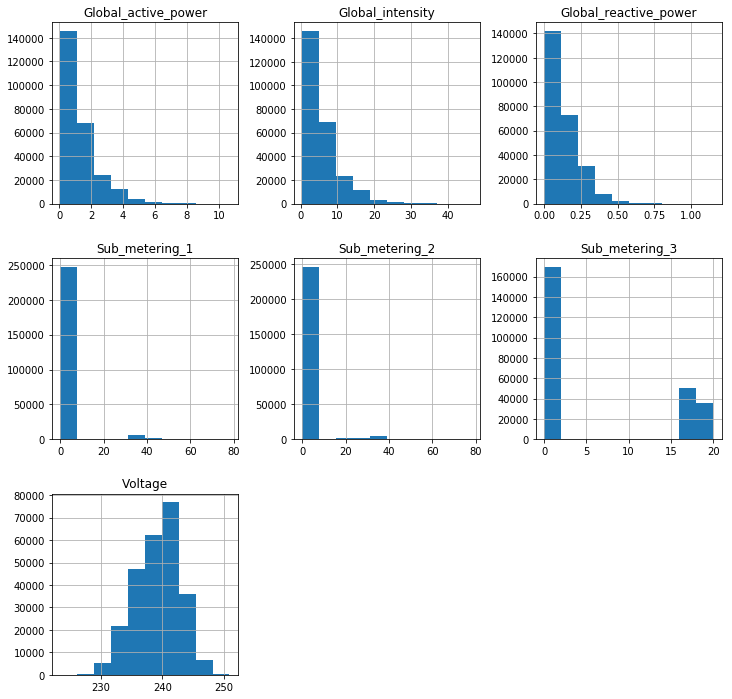

In [16]:
df.hist(figsize=(12,12));

In [17]:
#df.plot();

Look at the count field - lots of rows! Try running something like df.plot() - it takes a while. Imagine a dataset with 25 million rows. If we're going to be exploring and playing around, we might not want to wait for things to complete. So, sampling! Your next task will be to generate a smaller dataset for data exploration

# `________________________________________________________________`




## Task 2: Subsampling

Create two new dataframes, one with the first 1000 rows of df and another with 1000 rows starting from 75,000. 

In [18]:
df_samp1 = df.iloc[:1000].copy() #.copy() added to avoid warnings when we modify the copy
df_samp1

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,1/1/07,0:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0,2007-01-01 00:00:00
1,1/1/07,0:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0,2007-01-01 00:01:00
2,1/1/07,0:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0,2007-01-01 00:02:00
3,1/1/07,0:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0,2007-01-01 00:03:00
4,1/1/07,0:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0,2007-01-01 00:04:00
5,1/1/07,0:05:00,2.550,0.100,241.83,10.4,0.0,0.0,0.0,2007-01-01 00:05:00
6,1/1/07,0:06:00,2.534,0.096,241.07,10.4,0.0,0.0,0.0,2007-01-01 00:06:00
7,1/1/07,0:07:00,2.484,0.000,241.29,10.2,0.0,0.0,0.0,2007-01-01 00:07:00
8,1/1/07,0:08:00,2.468,0.000,241.23,10.2,0.0,0.0,0.0,2007-01-01 00:08:00
9,1/1/07,0:09:00,2.486,0.000,242.18,10.2,0.0,0.0,0.0,2007-01-01 00:09:00


In [19]:
df_samp2 = df.iloc[75000:76000].copy()
df_samp2

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
75002,22/2/2007,2:02:00,2.286,0.046,240.42,9.4,0.0,0.0,0.0,2007-02-22 02:02:00
75003,22/2/2007,2:03:00,2.284,0.048,240.33,9.4,0.0,0.0,0.0,2007-02-22 02:03:00
75004,22/2/2007,2:04:00,2.406,0.000,240.12,10.0,0.0,0.0,0.0,2007-02-22 02:04:00
75005,22/2/2007,2:05:00,2.432,0.046,238.68,10.2,0.0,0.0,0.0,2007-02-22 02:05:00
75006,22/2/2007,2:06:00,2.382,0.048,238.65,10.0,0.0,0.0,0.0,2007-02-22 02:06:00
75007,22/2/2007,2:07:00,2.330,0.048,238.81,9.6,0.0,0.0,0.0,2007-02-22 02:07:00
75008,22/2/2007,2:08:00,2.340,0.050,239.31,9.6,0.0,0.0,0.0,2007-02-22 02:08:00
75009,22/2/2007,2:09:00,2.366,0.056,240.79,9.8,0.0,0.0,0.0,2007-02-22 02:09:00
75010,22/2/2007,2:10:00,2.366,0.058,241.00,9.8,0.0,0.0,0.0,2007-02-22 02:10:00
75011,22/2/2007,2:11:00,2.366,0.058,241.13,9.8,0.0,0.0,0.0,2007-02-22 02:11:00


Do you think the first 1000 rows will give a good picture of the whole dataset? Find the mean and std dev for both of your small datasets. Do they match? Do they reflect the statistics for the dataset as a whole? Write your answers to these questions in a cell below the code you use to create and investigate these new dataframes.

In [20]:
# Answer here - explain your code and reasoning with extra cells for explanation.

df_samp1.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000
mean,2.384750,0.101824,240.421420,9.874600,0.0,0.246000,3.161000
std,0.573988,0.091648,2.011932,2.345493,0.0,0.545694,6.738582
min,0.204000,0.000000,235.300000,0.800000,0.0,0.000000,0.000000
25%,2.420000,0.000000,238.790000,9.800000,0.0,0.000000,0.000000
50%,2.512000,0.114000,240.560000,10.400000,0.0,0.000000,0.000000
75%,2.602000,0.138000,241.910000,10.800000,0.0,0.000000,0.000000
max,3.558000,0.454000,245.070000,14.600000,0.0,2.000000,19.000000


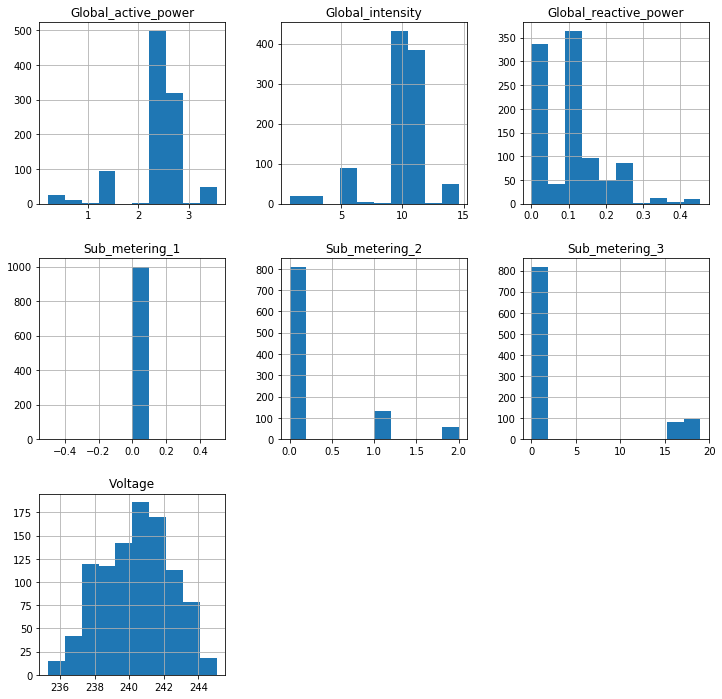

In [21]:
df_samp1.hist(figsize=(12,12));

In [22]:
df_samp2.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.0,1000.000000,1000.000000
mean,1.817320,0.086288,239.81412,7.574400,0.0,0.249000,6.926000
std,1.172717,0.074975,2.10217,4.928638,0.0,0.552543,8.534833
min,0.252000,0.000000,233.84000,1.000000,0.0,0.000000,0.000000
25%,0.719000,0.046000,238.47000,3.000000,0.0,0.000000,0.000000
50%,1.560000,0.078000,239.74500,6.400000,0.0,0.000000,0.000000
75%,2.385000,0.114000,241.40250,9.800000,0.0,0.000000,17.000000
max,8.244000,0.356000,244.97000,35.000000,0.0,2.000000,18.000000


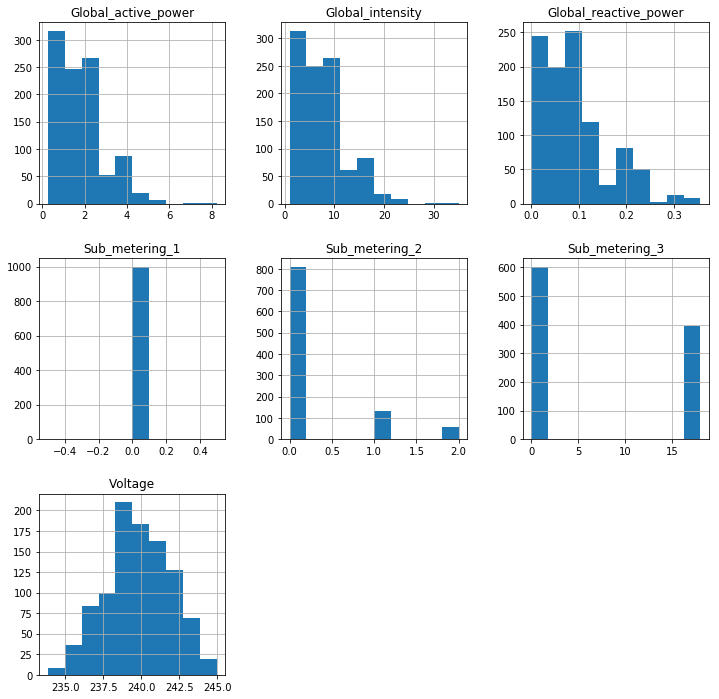

In [23]:
df_samp2.hist(figsize=(12,12));

 on the first sample we can see that the standard deviation is small this tells us that the results are close to the mean, 
 whereas since the standard deviation for the second sample is large, then the results should be more spread out.
 
 
 
 

Create one new dataframewith the first 10,000 rows of data. Use random sampling to create a dataframe with 10,000 rows taken randomly from within the data and name it df_small. Is this a better representation of the dataset as a whole? If so, we can move on. If not, add more data or make other changes you feel are necessary.

In [24]:
df_small = df.sample(n = 10000)

In [25]:
df_small.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.171345,0.125682,239.223908,5.005860,1.271200,1.785100,5.776500
std,1.187807,0.112464,3.572713,5.022354,6.459506,6.873241,8.164987
min,0.084000,0.000000,226.090000,0.400000,0.000000,0.000000,0.000000
25%,0.298000,0.046000,236.690000,1.400000,0.000000,0.000000,0.000000
50%,0.580000,0.106000,239.590000,2.600000,0.000000,0.000000,0.000000
75%,1.608000,0.198000,241.840000,6.800000,0.000000,1.000000,17.000000
max,9.316000,0.960000,249.500000,41.000000,64.000000,73.000000,19.000000


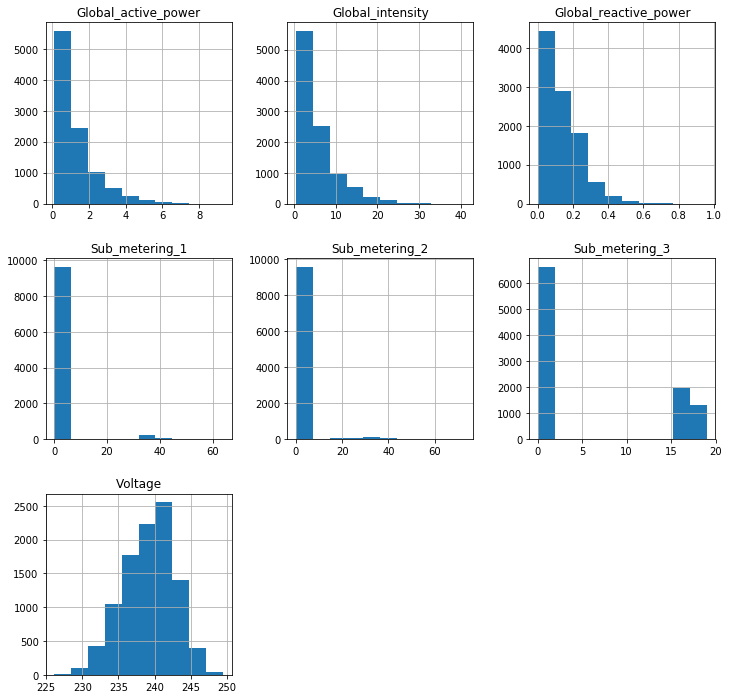

In [26]:
df_small.hist(figsize=(12,12));

# `________________________________________________________________`




## Task 3: Correlation and Plotting

Explore the correlation of various features in the graph. Plot some scatterplots showing the features with the highest correlation coeficient, and some for those with the lowest correlation coeficient. 

- Name two pairs of highly correlated variables. 
- Produce at least three scatter plots.

### Answer:

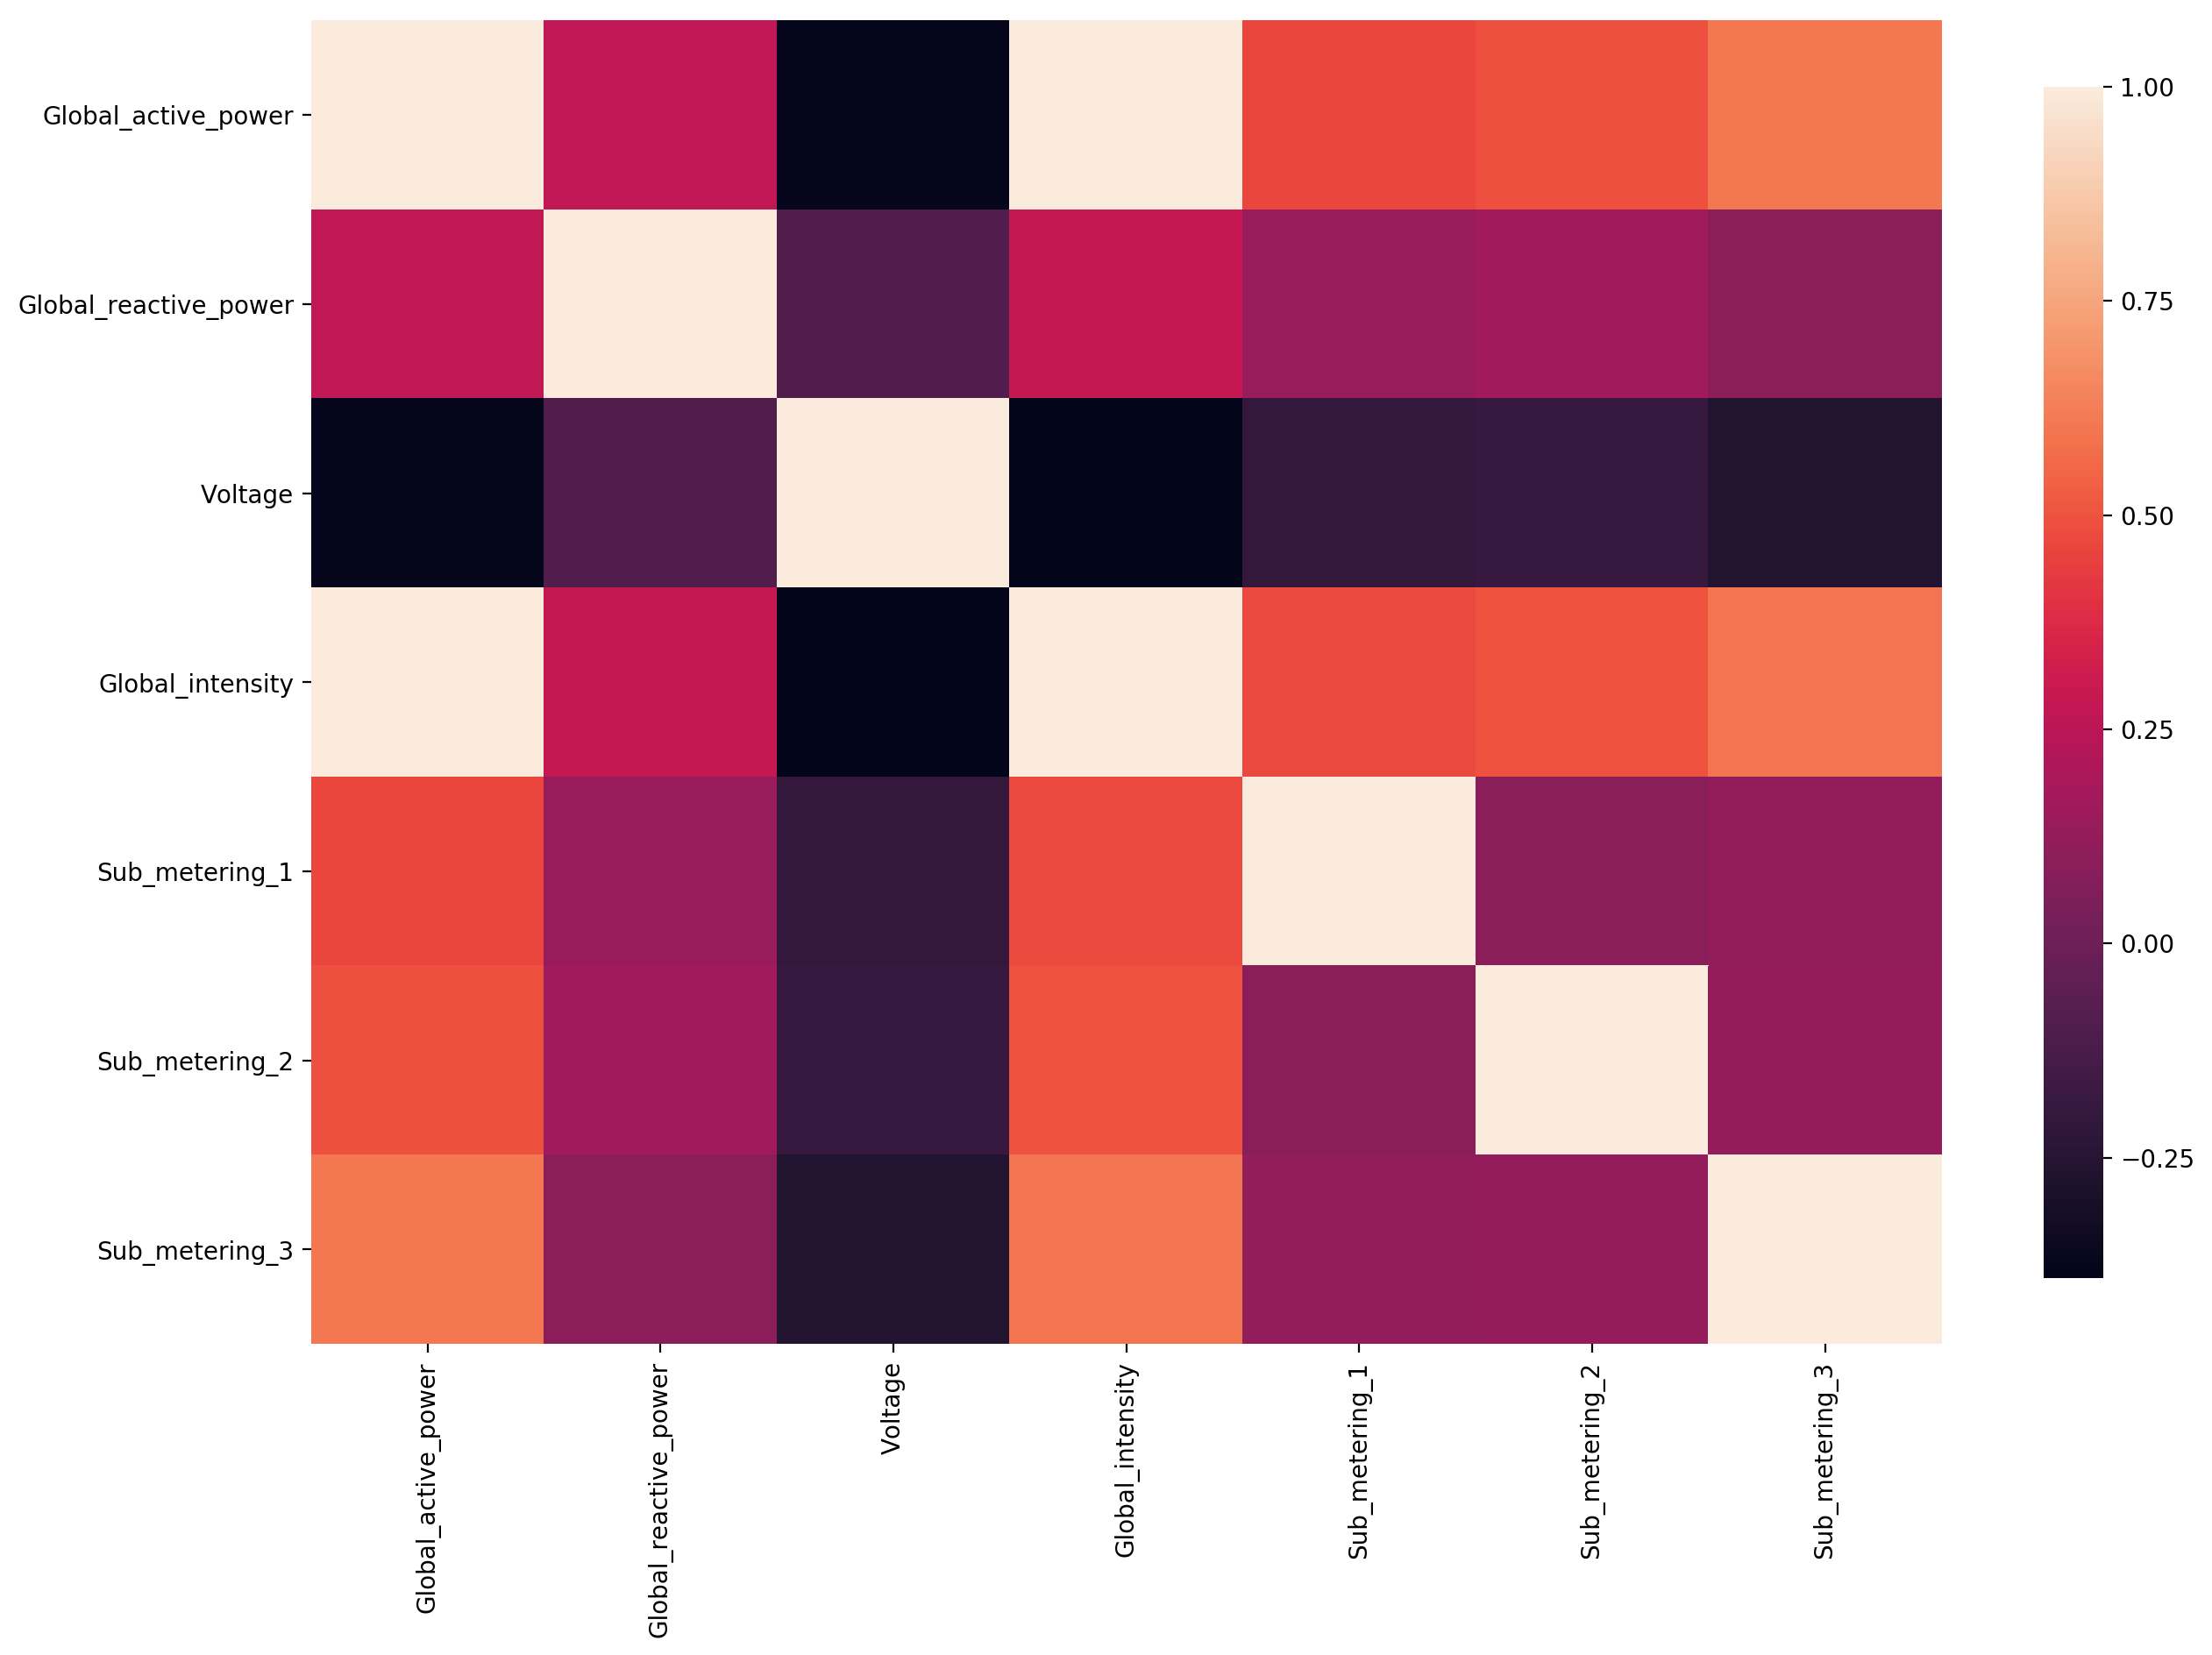

In [27]:
corr = df_small.corr()
plt.figure(figsize=(15, 10), dpi=200)
sns.heatmap(corr, xticklabels=corr.columns.values, 
            yticklabels=corr.columns.values,
            cbar_kws={"shrink": .9})

`Global_active_power` and `Global_intensity`have a strongly positive correlation

`Global_active_power` and `Voltage` have a strongly negative correlation




.




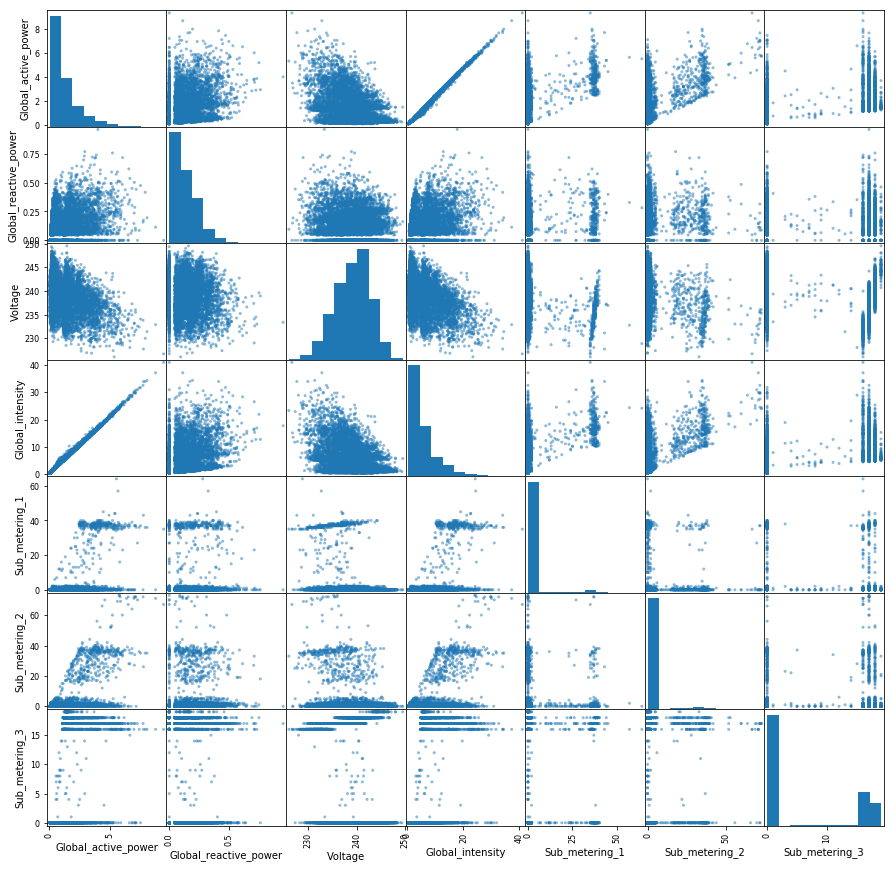

In [28]:
scatter_matrix(df_small,figsize=(15, 15))
plt.show()

# `________________________________________________________________`




## Task 4: Simple Linear Regression

Find the parameters of a simple linear model with Global_intensity as the explanatory variable and Global_active_power as the dependent variable

- Print out the model parameters and score

### Answer:

In [29]:
# Build a simple model and find parameters, as well as the R-Squared Value

In [30]:
# import model from Scikit-learn's sklearn library
from sklearn import linear_model

# initialize the model, and name it lr1
lr1 = linear_model.LinearRegression()

In [31]:
x = np.array(df_small['Global_intensity']).reshape(-1, 1)

In [32]:
Y = np.array(df_small['Global_active_power']).reshape(-1, 1)

In [33]:
lr1.fit(X = x,y = Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
print ("Intercept: ", lr1.intercept_)
print ("Coefficient: ",lr1.coef_)
print (lr1.score(x, Y))

Intercept:  [-0.0112594]
Coefficient:  [[0.23624392]]
0.9978011697419443


# `________________________________________________________________`




## Task 5: Regression, but harder this time

You didn't think it was going to be that easy? Intensity and power are different measures of essentially the same thing. We want to predict power from the other readings - a much harder task.

Tasks: 
- Predict the power based on as many of the other factors as you think necessary. As before, print out model parameters and the score, both when using the model on your sample and when running it (i.e. score()) over the whole dataset.

### Answer:

In [35]:
x1 = np.array(df_small['Voltage']).reshape(-1, 1)

In [36]:
x2 = np.array(df_small['Global_reactive_power']).reshape(-1, 1)

In [37]:
INPUT = [[float(x[i]), float(x1[i]), float(x2[i])] for i in range(len(x))]

In [38]:
INPUT

[[2.6, 239.41, 0.126],
 [7.8, 236.48, 0.134],
 [6.8, 238.16, 0.096],
 [1.0, 236.03, 0.052],
 [6.2, 243.73, 0.244],
 [1.8, 238.4, 0.226],
 [3.0, 243.48, 0.464],
 [14.0, 234.18, 0.128],
 [1.0, 241.69, 0.0],
 [1.4, 240.01, 0.218],
 [1.2, 237.8, 0.082],
 [5.6, 243.6, 0.154],
 [5.6, 240.53, 0.122],
 [5.4, 234.2, 0.074],
 [1.4, 238.43, 0.1],
 [1.4, 239.87, 0.114],
 [6.0, 235.32, 0.208],
 [2.6, 243.99, 0.0],
 [4.2, 241.96, 0.202],
 [5.6, 237.09, 0.198],
 [1.6, 244.23, 0.084],
 [1.0, 241.15, 0.0],
 [5.6, 240.01, 0.11],
 [11.0, 235.92, 0.148],
 [1.2, 242.18, 0.09],
 [1.0, 236.17, 0.06],
 [0.6, 235.72, 0.0],
 [2.0, 240.65, 0.27],
 [9.8, 239.18, 0.0],
 [10.2, 238.85, 0.0],
 [0.6, 240.6, 0.0],
 [7.2, 241.19, 0.164],
 [8.8, 240.84, 0.08],
 [15.2, 237.71, 0.0],
 [5.8, 239.64, 0.196],
 [14.4, 238.95, 0.0],
 [1.8, 238.98, 0.23],
 [1.8, 238.99, 0.082],
 [25.6, 229.2, 0.204],
 [1.6, 240.89, 0.226],
 [3.4, 232.79, 0.436],
 [5.6, 238.11, 0.088],
 [8.2, 238.56, 0.254],
 [9.2, 239.49, 0.086],
 [6.4, 242.58,

In [39]:
mlr1 = linear_model.LinearRegression()
mlr1.fit(X = INPUT,y = Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
# intercept + coef + score
print("Intercept: ", float(mlr1.intercept_))
print("Coefficient: ", mlr1.coef_)
print("Score: ", mlr1.score(INPUT, Y))

Intercept:  -1.006647341647797
Coefficient:  [[ 0.23859678  0.00420865 -0.18459824]]
Score:  0.9982117769793162


## Task 6 - Logistic Regression

Use logistic regression to predict occasions when Sub_metering_1 is greater than Sub_metering_2 - in other words, when is the kitchen more in use then the laundry room? 
Tasks: 
- Add a column with a 1 when kitchen power is higher than laundry room (sub_metering_1>2) and a 0 when not. 
- Build a logistic regression model with this as the dependant variable. Use any variables as inputs.
- How did your model score? Briefly comment with your thoughts. Do you think this is something one could feasibly predict from the available data?

## Task 7 - Visualizations and conclusions

Well done! You're almost through. Now for some final easy points, pick three of the following questions and create a visualization and some text to answer the question:
- What time of day is the kitchen used?
- Does the weekly power consumption remain constant?
- Which sub-metering zone used the most power?
- How did power use in the different zones change over time?
- How did the two small subsamples you created in the beginning (1000 rows each) differ?

#### - How did the two small subsamples you created in the beginning (1000 rows each) differ?